# VGG - 16 Model

## Structure Diagram

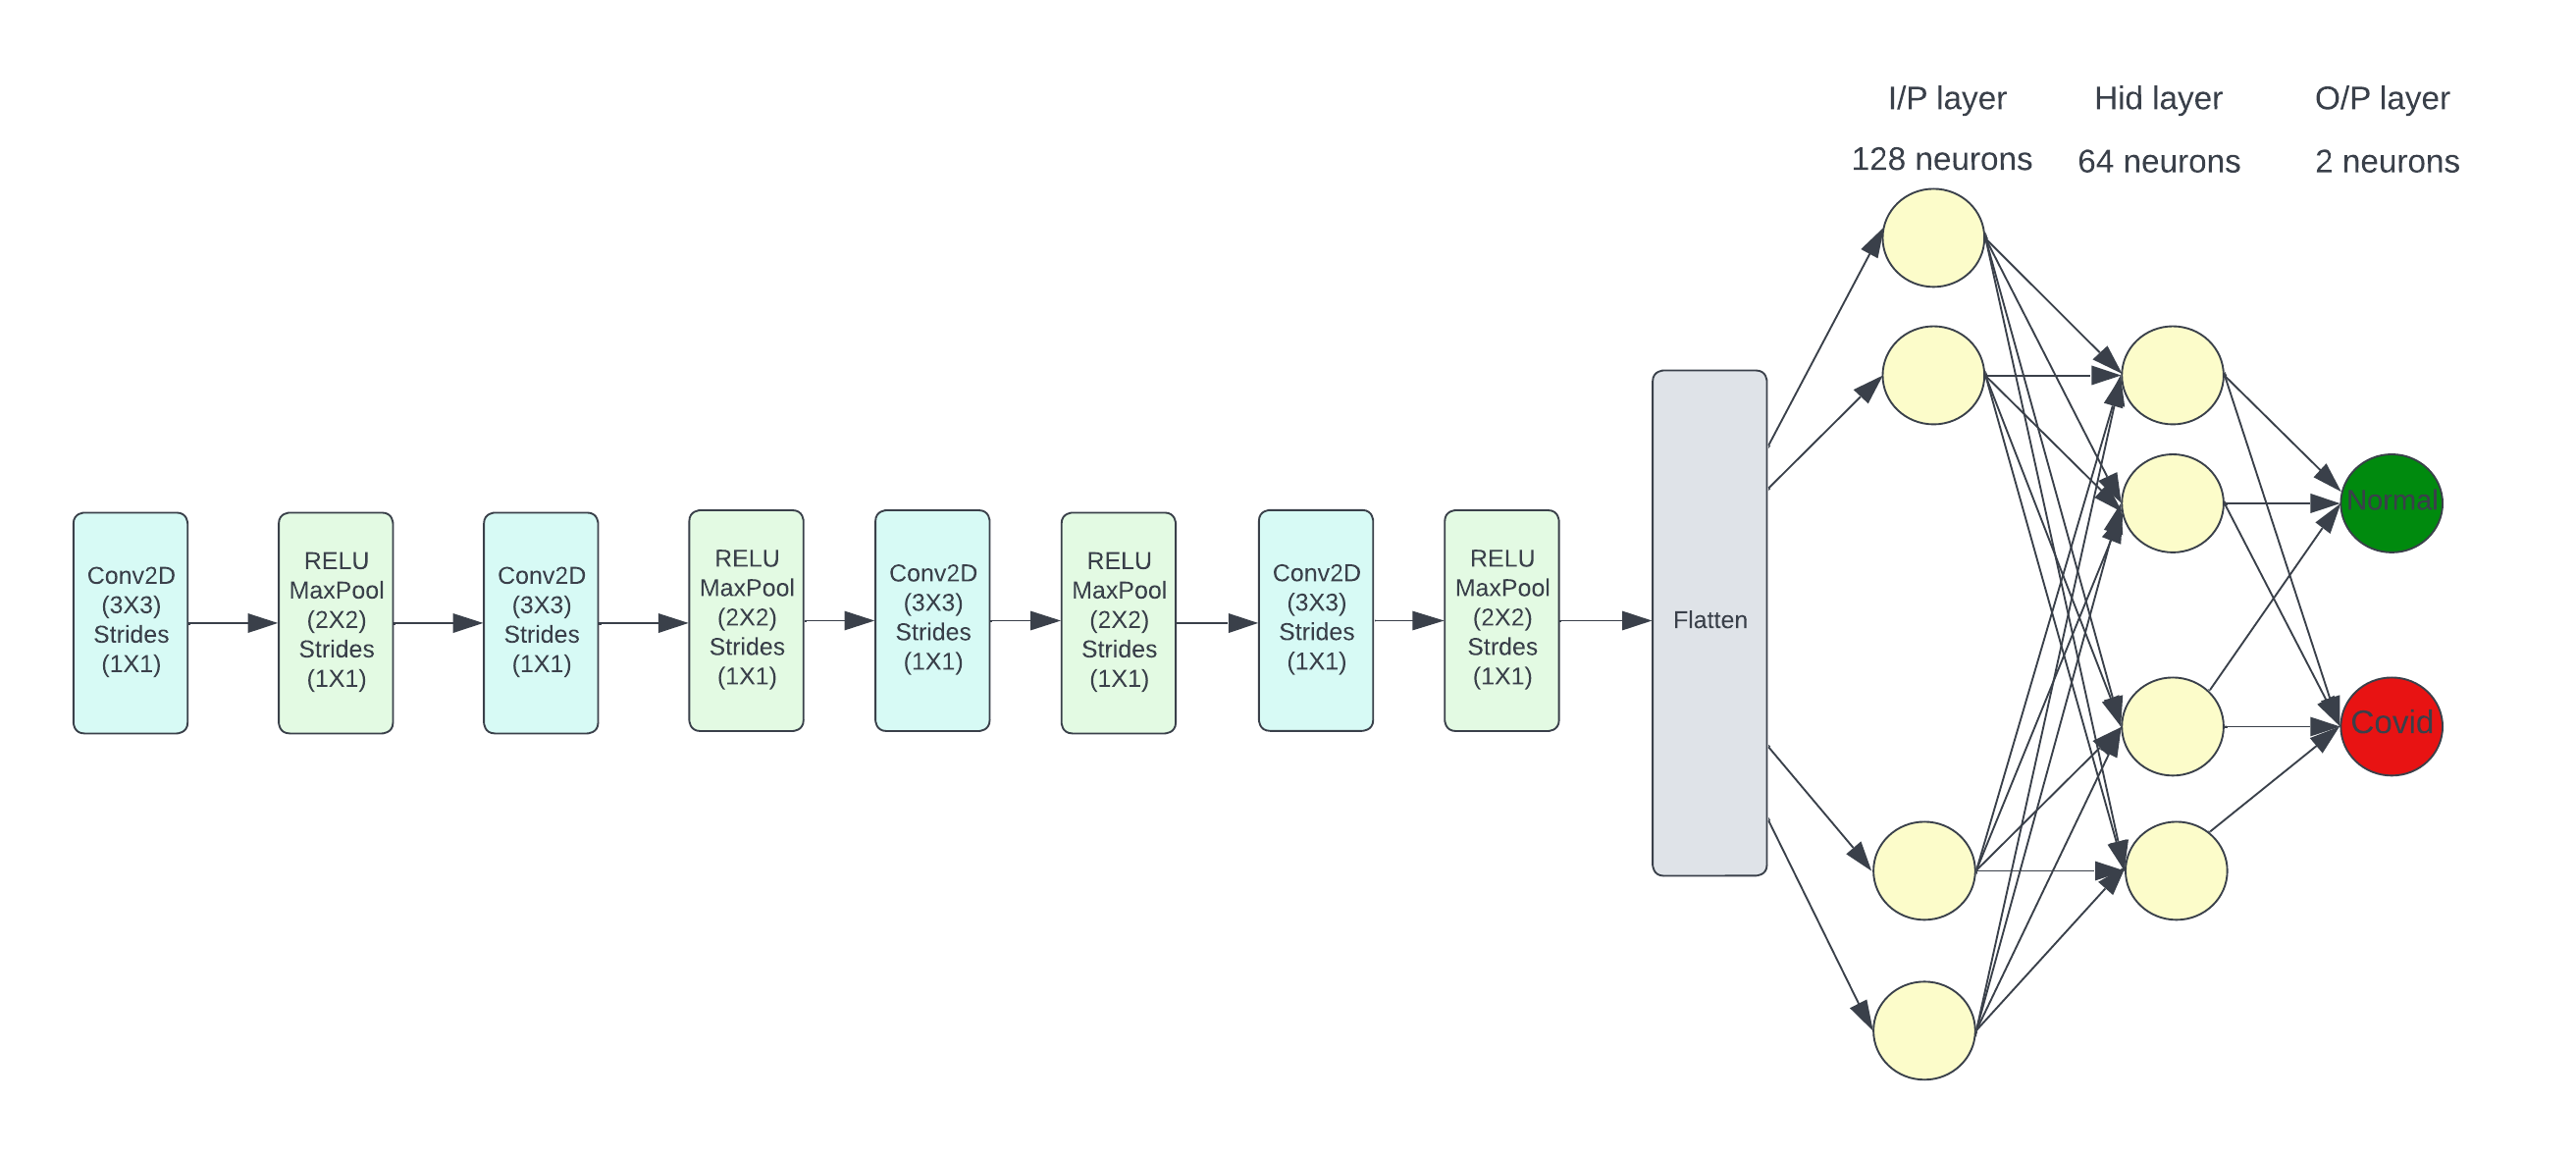

# Program Code

### Importing Libraries

In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

import joblib

### Defining Basic Variables for Use

In [2]:
BATCH_SIZE = 16
IMG_SIZE = (256, 256)
BASE_DIR = './drive/MyDrive/Minor Project'
TRAIN_DIR = os.path.join(BASE_DIR, 'Dataset/train')
TEST_DIR = os.path.join(BASE_DIR, 'Dataset/test')
VAL_DIR = os.path.join(BASE_DIR, 'Dataset/Validation')

### Fetching Images

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical')
validation_generator = val_datagen.flow_from_directory(
        VAL_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = False,
        class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size = IMG_SIZE,
        color_mode = 'grayscale',
        batch_size = BATCH_SIZE,
        shuffle = False,
        class_mode = 'categorical')

Found 10356 images belonging to 2 classes.
Found 1381 images belonging to 2 classes.
Found 2071 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1}

### Showing Some Images

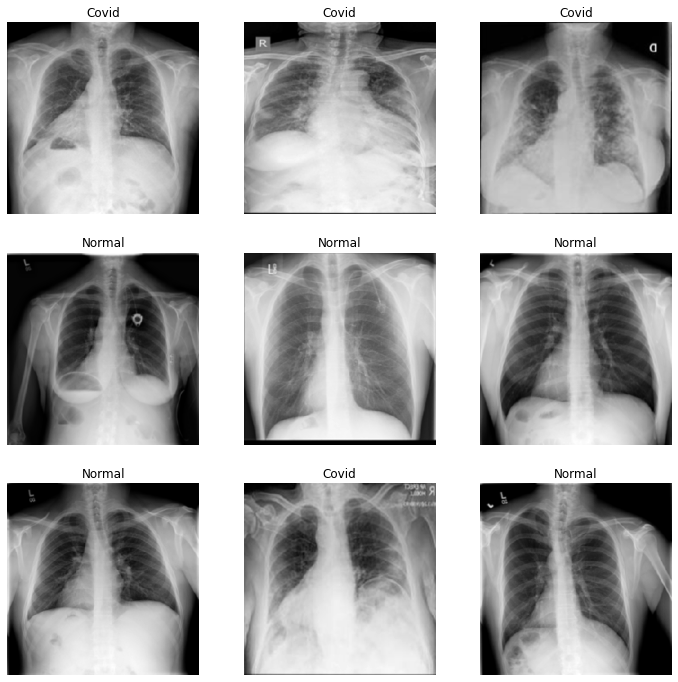

In [8]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    plt.imshow(np.squeeze(img[0]), cmap='gray')
    dic = {0:'Covid', 1:'Normal'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

### Defining Structure of Model

In [ ]:
def VGG_16_Model(IMG_SIZE):
   IP_SHAPE = IMG_SIZE + (1, )
   model = Sequential([
     Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding='same',input_shape=IP_SHAPE),
     MaxPooling2D(pool_size = (2, 2)), 
     Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu"),
     MaxPooling2D(pool_size = (2, 2)), 
     Conv2D(filters=64, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Conv2D(filters=64, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Conv2D(filters=128, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Conv2D(filters=128, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Conv2D(filters=128, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Conv2D(filters=256, kernel_size=(3, 3), padding='same',activation="relu"),
     MaxPooling2D(pool_size = (2, 2)),
     Flatten(),   
     Dense(units=128, activation='relu'),
     Dense(units=64, activation='relu'),
     Dense(units=2, activation='sigmoid')
   ])
   return model

In [ ]:
Covid_VGG_16 = VGG_16_Model(IMG_SIZE)
Covid_VGG_16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

### Model Training

In [ ]:
base_learning_rate = 0.001
Covid_VGG_16.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
initial_epochs = 20
history = Covid_VGG_16.fit(train_generator, epochs=initial_epochs, validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/20
648/648 [==============================] - 2200s 3s/step - loss: 0.5094 - accuracy: 0.7638 - val_loss: 0.3627 - val_accuracy: 0.8284
Epoch 2/20
648/648 [==============================] - 114s 176ms/step - loss: 0.2764 - accuracy: 0.8810 - val_loss: 0.2063 - val_accuracy: 0.9146
Epoch 3/20
648/648 [==============================] - 114s 176ms/step - loss: 0.1880 - accuracy: 0.9269 - val_loss: 0.1562 - val_accuracy: 0.9442
Epoch 4/20
648/648 [==============================] - 115s 178ms/step - loss: 0.1556 - accuracy: 0.9402 - val_loss: 0.1448 - val_accuracy: 0.9471
Epoch 5/20
648/648 [==============================] - 113s 174ms/step - loss: 0.1214 - accuracy: 0.9542 - val_loss: 0.1274 - val_accuracy: 0.9616
Epoch 6/20
648/648 [==============================] - 112s 173ms/step - loss: 0.1041 - accuracy: 0.9610 - val_loss: 0.1067 - val_accuracy: 0.9609
Epoch 7/20
648/648 [==============================] - 112s 173ms/step - loss: 0.0896 - accuracy: 0.9656 - val_loss: 0.1017 - v

### Model Evaluation

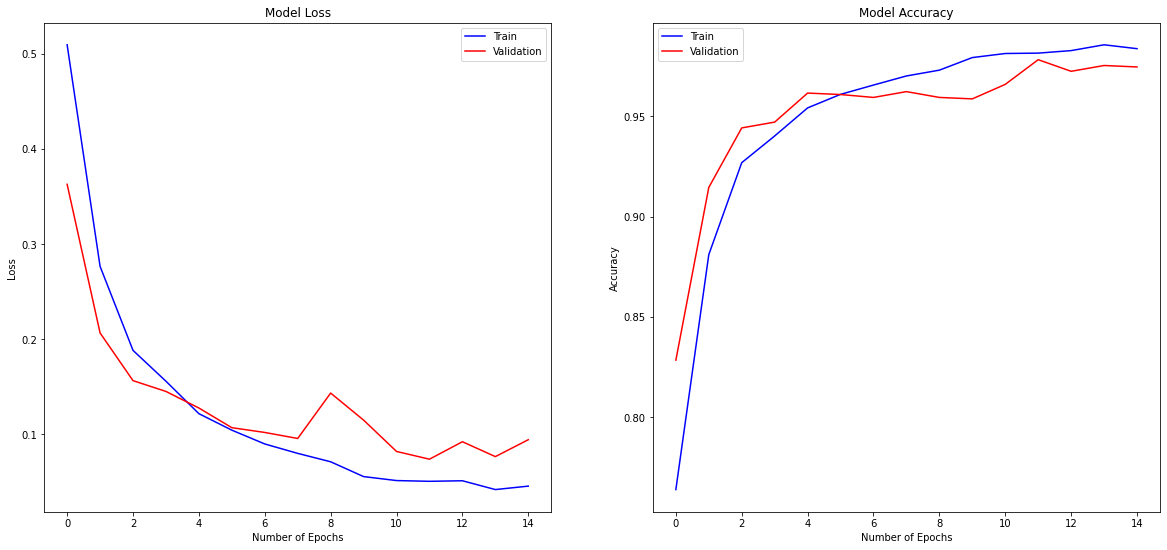

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(train_loss))
plt.figure(figsize=(20, 9))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, color='b', label='Train')
plt.plot(epochs, val_loss, color='r', label='Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1,2,2)
plt.plot(epochs, acc, color='b', label='Train')
plt.plot(epochs, val_acc, color='r', label='Validation')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()

In [ ]:
yp_test = Covid_VGG_16.predict(test_generator)
yp_test = list(np.argmax(yp_test, axis=-1))
yo_test = test_generator.classes


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       542
           1       0.98      0.99      0.98      1529

    accuracy                           0.98      2071
   macro avg       0.98      0.97      0.97      2071
weighted avg       0.98      0.98      0.98      2071



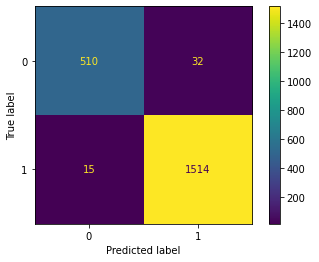

In [ ]:
cm_test = ConfusionMatrixDisplay(confusion_matrix(yo_test, yp_test))
cm_test.plot()
print("\nClassification Report for Test Data\n")
print(classification_report(yo_test, yp_test)) 

### Saving the Model 

In [ ]:
joblib.dump(Covid_VGG_16, os.path.join(BASE_DIR, 'Covid_VGG_16.joblib'))

INFO:tensorflow:Assets written to: ram://6af7c813-0e4a-43ca-a86f-1c3aa3853891/assets


['./drive/MyDrive/Minor Project/Covid_VGG_16.joblib']